In [1]:
import cv2
import matplotlib.pyplot as plt

In [40]:
img = cv2.imread('./test_images/markrober1.png')
img.shape

(1501, 1501, 3)

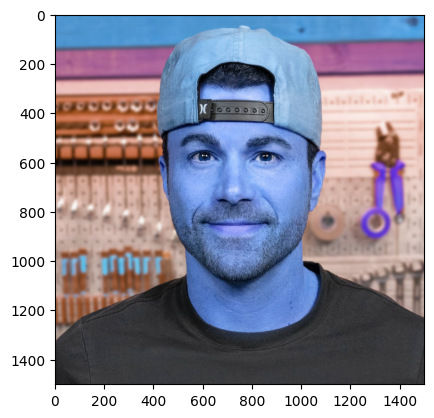

In [41]:
plt.imshow(img)

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1501, 1501)

In [43]:
gray

array([[156, 156, 156, ..., 177, 177, 177],
       [156, 156, 156, ..., 177, 177, 177],
       [156, 156, 156, ..., 177, 177, 177],
       ...,
       [ 36,  38,  30, ...,  55,  53,  50],
       [ 41,  34,  28, ...,  54,  55,  54],
       [ 45,  37,  28, ...,  54,  52,  53]],
      shape=(1501, 1501), dtype=uint8)

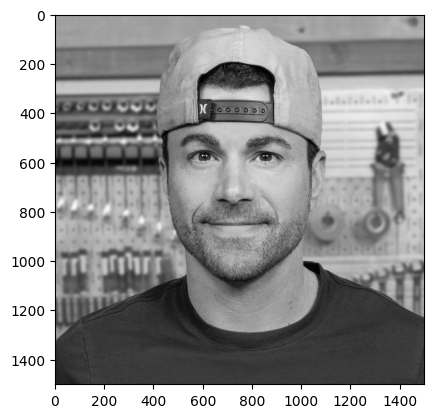

In [44]:
plt.imshow(gray,cmap='gray')

Faces detected: 1


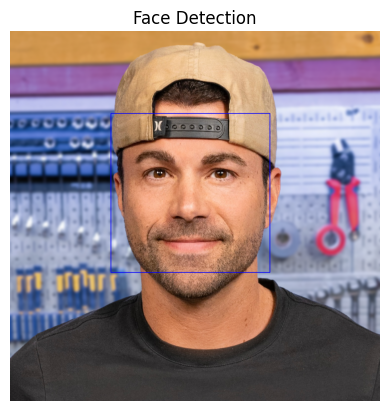

In [45]:
import cv2

face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

from matplotlib import pyplot as plt

# Load classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load image
img = cv2.imread('./test_images/markrober1.png')
if img is None:
    raise IOError("Image not found")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 7)
print("Faces detected:", len(faces))

# Draw rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Face Detection")
plt.axis('off')
plt.show()

Faces detected: 1


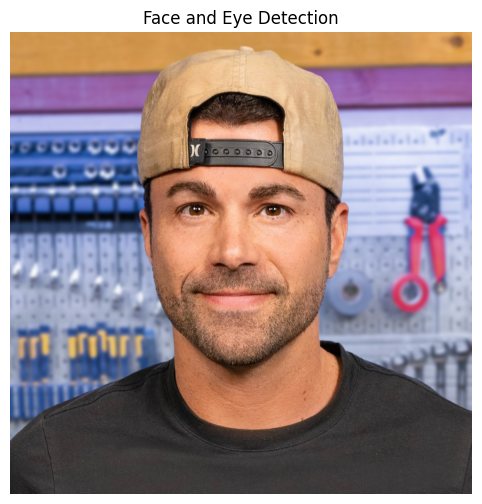

In [46]:
import cv2
from matplotlib import pyplot as plt

# Load cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load image
img = cv2.imread('./test_images/markrober1.png')
if img is None:
    raise IOError("Image not found")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 6)
print("Faces detected:", len(faces))

# Show image with rectangles on faces and eyes
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Face and Eye Detection")
plt.axis('off')
plt.show()


Face 1 coords: x=409, y=334, w=645, h=645
Eyes detected in face 1: 2
Cropped face 1 shape: (645, 645, 3)


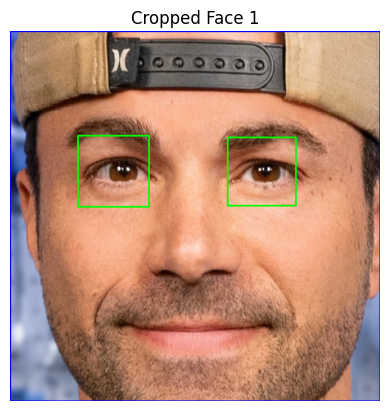

In [47]:
# Draw and crop each face
for i, (x, y, w, h) in enumerate(faces):
    # Convert to int (just in case)
    x, y, w, h = map(int, (x, y, w, h))

    print(f"Face {i+1} coords: x={x}, y={y}, w={w}, h={h}")

    # Draw face rectangle on original image
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Detect eyes in upper half of face
    roi_gray = gray[y:y + h // 2, x:x + w]
    roi_color = img[y:y + h // 2, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=7)
    print(f"Eyes detected in face {i+1}: {len(eyes)}")

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    # Crop full face region from original image
    cropped_face = img[y:y + h, x:x + w]
    print(f"Cropped face {i+1} shape:", cropped_face.shape)

    # Show cropped face
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
    plt.title(f"Cropped Face {i+1}")
    plt.axis('off')

# Cropped Dataset

In [55]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [56]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [57]:
img_dirs

['./dataset/virat_kohli',
 './dataset/pv_sindhu',
 './dataset/elon_musk',
 './dataset/mr_beast',
 './dataset/robert_downey_jr']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [59]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/virat_kohli
Generating cropped images in folder:  ./dataset/cropped/pv_sindhu
Generating cropped images in folder:  ./dataset/cropped/elon_musk
Generating cropped images in folder:  ./dataset/cropped/mr_beast
Generating cropped images in folder:  ./dataset/cropped/robert_downey_jr
